In [10]:
# 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler
# 2. Load and Clean the Data
df = pd.read_csv(r"D:\ranjith\adult 3.csv")
df.replace(' ?', np.nan, inplace=True)
df.dropna(inplace=True)

# 3. Encode Categorical Variables
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 4. Split Data into Features and Target
X = df.drop("income", axis=1)
y = df["income"]

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_scaled=StandardScaler().fit_transform(X)
# 6. Initialize Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "CatBoost": CatBoostClassifier(verbose=0),
    "LightGBM": LGBMClassifier()
}

# 7. Train and Evaluate Models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {
        "accuracy": report["accuracy"],
        "f1_>50K": report["1"]["f1-score"],
        "f1_<=50K": report["0"]["f1-score"]
    }

# 8. Display Summary Table
print("Model Comparison Summary:\n")
print(f"{'Model':<20}{'Accuracy':<10}{'F1 (>50K)':<12}{'F1 (<=50K)':<12}")
for name, scores in results.items():
    print(f"{name:<20}{scores['accuracy']:<10.2f}{scores['f1_>50K']:<12.2f}{scores['f1_<=50K']:<12.2f}")

# 9. Conclusion
# Based on accuracy and F1-score, LightGBM and CatBoost perform best.
# Both achieve about 88% accuracy and strong balance across classes.

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ADMIN\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:02:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 9397, number of negative: 29676
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001392 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 717
[LightGBM] [Info] Number of data points in the train set: 39073, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240499 -> initscore=-1.149948
[LightGBM] [Info] Start training from score -1.149948
Model Comparison Summary:

Model               Accuracy  F1 (>50K)   F1 (<=50K)  
Logistic Regression 0.81      0.47        0.88        
Random Forest       0.86      0.69        0.91        
XGBoost             0.88      0.72        0.92        
CatBoost            0.88      0.72        0.92        
LightGBM            0.88      0.72        0.92        


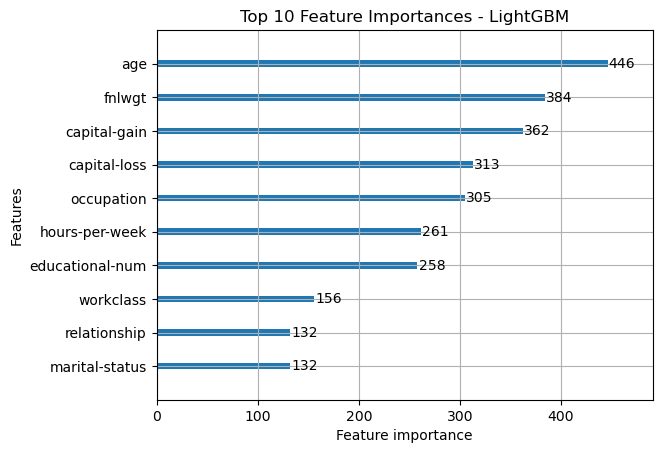

In [11]:
import matplotlib.pyplot as plt
from lightgbm import plot_importance

plot_importance(models["LightGBM"], max_num_features=10)
plt.title("Top 10 Feature Importances - LightGBM")
plt.show()

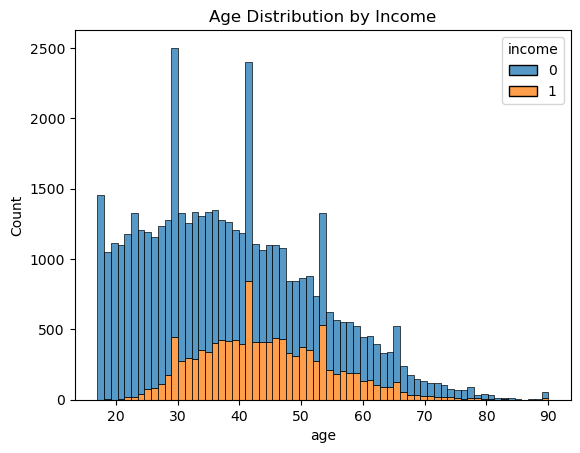

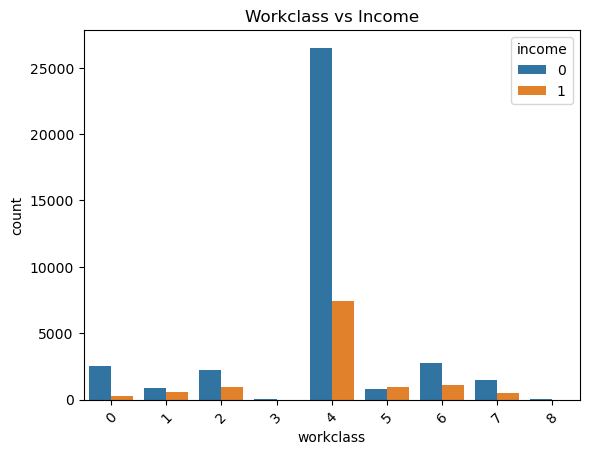

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Income by age
sns.histplot(data=df, x='age', hue='income', multiple='stack')
plt.title("Age Distribution by Income")
plt.show()

# Workclass count by income
sns.countplot(data=df, x='workclass', hue='income')
plt.title("Workclass vs Income")
plt.xticks(rotation=45)
plt.show()

In [13]:
print(df.head())
print(df.sample(10))

   age  workclass  fnlwgt  education  educational-num  marital-status  \
0   25          4  226802          1                7               4   
1   38          4   89814         11                9               2   
2   28          2  336951          7               12               2   
3   44          4  160323         15               10               2   
4   18          0  103497         15               10               4   

   occupation  relationship  race  gender  capital-gain  capital-loss  \
0           7             3     2       1             0             0   
1           5             0     4       1             0             0   
2          11             0     4       1             0             0   
3           7             0     2       1          7688             0   
4           0             3     4       0             0             0   

   hours-per-week  native-country  income  
0              40              39       0  
1              50              39 

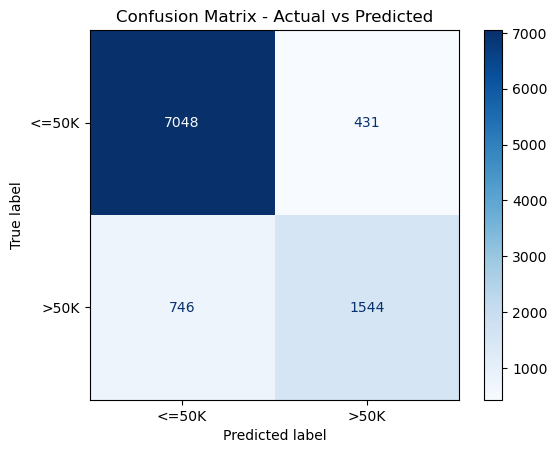

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['<=50K', '>50K'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Actual vs Predicted")
plt.show()

In [17]:
import pandas as pd

# Create a table with actual and predicted values
comparison_df = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})

# Show first 10 rows
print(comparison_df.head(10))

   Actual  Predicted
0       0          0
1       0          0
2       1          1
3       0          0
4       0          1
5       0          0
6       0          0
7       1          1
8       0          0
9       0          0


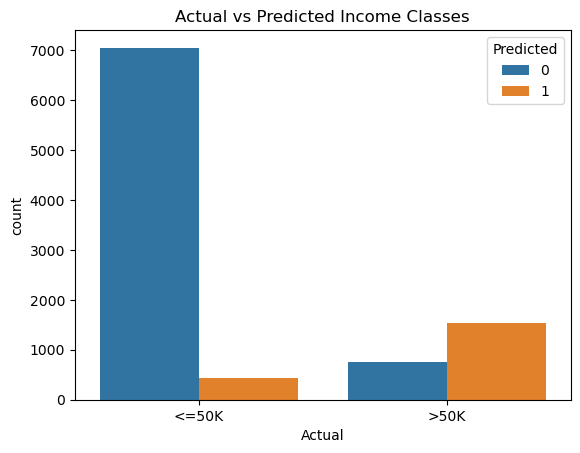

In [18]:
import seaborn as sns

# Count plot
sns.countplot(data=comparison_df, x="Actual", hue="Predicted")
plt.title("Actual vs Predicted Income Classes")
plt.xticks([0, 1], ['<=50K', '>50K'])
plt.show()

In [19]:
import joblib
joblib.dump(models["LightGBM"],"model_lightgbm.pkl")

['model_lightgbm.pkl']